## Homework 5 Questions

Same drill as Homework 3, the following questions are intended to get you familiarized with the [provided dataset](https://docs.google.com/spreadsheets/d/1tcqGAlaBOd9L9Lhb9u9_nUg9dSRY1usF80l2RNKiQN0/edit?usp=sharing). By answering these questions, it will hopefully give insights on how to complete the actual task (slide deck generation for the CEO).

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [1]:
# dataset import
import pandas as pd
df = pd.read_csv("GPA Dataset.csv")

Data cleaning:

In [2]:
# dataset clean up

# check duplicates
print(len(df))
print(len(df.drop_duplicates()))

73
73


In [3]:
# fix and fill in blank values

# change all numbers so it looks like hours per day
# for column 'What is your average screentime?'
def fix_and_fill(row):
  val = row['What is your average screentime?']
  #print(val)
  if (val > 24.0) & (val < 150.0):
    row['What is your average screentime?'] = val / 24
  elif val > 150.0:
    row['What is your average screentime?'] = val / 60

  return row

df = df.apply(fix_and_fill, axis = 1)


In [4]:
import statistics as stat

# fill in blank integer cols with mode value of that column
for column in df.iloc[:, 9:]:
    col = df[column]
    mode_val = stat.mode(col)
    df[column] = df[column].fillna(value = mode_val)

df.iloc[:, 9:]

mode_val = stat.mode(df['At what age did you start programming?'])

df['At what age did you start programming?'] = df['At what age did you start programming?'].fillna(value = mode_val)

1. Which was the most predictive factor for GPA? i.e., which factor had the most "power" over predicting the GPA?

Your answer:

In [5]:
from sklearn.preprocessing import LabelEncoder

#
label_encoder = LabelEncoder()
df['State encoded'] = label_encoder.fit_transform(df['What state are you from?'])
df['Major encoded'] = label_encoder.fit_transform(df['Major (Check all that apply)'])
df['Private School encoded'] = label_encoder.fit_transform(df['Have you at any point attended private school?'])
df['Scholarship encoded'] = label_encoder.fit_transform(df['Do you have a scholarship?'])
df['Parent in tech encoded'] = label_encoder.fit_transform(df['Do you have a parent in tech?'])
df['Study with friends encoded'] = label_encoder.fit_transform(df['Do you study with friends?'])
df['Notes encoded'] = label_encoder.fit_transform(df['Do you take notes in classes?'])

print(df.head())

            Timestamp What state are you from?   Major (Check all that apply)  \
0  11/5/2024 14:57:00                       NJ               Computer Science   
1  11/5/2024 14:57:33                       VA               Computer Science   
2  11/5/2024 14:57:41                       MD               Computer Science   
3  11/5/2024 14:57:50                       VA               Computer Science   
4  11/5/2024 14:57:54                       CA  Data, Government and Politics   

   At what age did you start programming?  \
0                                    14.0   
1                                     8.0   
2                                    14.0   
3                                    14.0   
4                                    11.0   

  Have you at any point attended private school? Do you have a scholarship?  \
0                                             No                        NaN   
1                                             No                    Partial   
2    

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# separate features and target
X = df.iloc[:, 9:].drop(columns=['What was your GPA LAST SEMESTER?'])
# target
y = df['What was your GPA LAST SEMESTER?']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# feature importance
importance = model.coef_

# data frame for feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

# not counting GPA of the semester before that
# since the gpa of semester before that is obviously directly
# and probably most impactful of gpa of last semester
# the notes taken impacts GPA the most with a value of: .076358

,Feature,Importance
4,What was your GPA THE SEMESTER BEFORE THAT?,0.475527
11,Notes encoded,0.076358
9,Parent in tech encoded,0.038959
0,How many credits did you take last semester?,0.028211
3,How many hours of sleep do you get a night?,0.013380
2,What is your average daily time on Tik Tok or ...,0.001480
10,Study with friends encoded,-0.000034
6,Major encoded,-0.006369
5,State encoded,-0.006739
1,What is your average screentime?,-0.013858


2. Which factor(s) didn't matter in predicting the GPA?

Your answer:

In [7]:
# looking at the table in the question above, at the middle of the list,
# the lowest importance factors were:
# studying with friends
# average tictok screen time
# what state they are from
# what major the student is

# the negative number mean negative correlation, so choosing numbers that are the smallest absolute value
# allowed me to see which factors impacted GPA the least

3. Besides the GPA information, which two questions had the highest correlation?

Your answer:

In [8]:
import pandas as pd
import numpy as np


# Drop the 'GPA' column to focus on other questions
df_no_gpa = df.iloc[:, 9:].drop(columns=['What was your GPA LAST SEMESTER?'
                , 'What was your GPA THE SEMESTER BEFORE THAT?'])

# corr matrix
df_corr = df_no_gpa.corr()

pd.melt(df_corr)
df_corr['col'] = df_corr.columns
df_corr
melted = pd.melt(df_corr, id_vars=['col'])

melted = melted[melted['value'] != 1]
melted
melted.sort_values('value', ascending = False)

# looking at the table:
# "studying with friends" and "having attended a private school"
# are the most correlated with a value of: 0.220332

# also there is a higher inverse relationship value between
# "hours of sleep" and "avg screen time"
# which had a value of: -0.309458

,col,variable,value
75,Study with friends encoded,Private School encoded,0.220332
105,Private School encoded,Study with friends encoded,0.220332
86,Study with friends encoded,Scholarship encoded,0.214519
106,Scholarship encoded,Study with friends encoded,0.214519
79,What is your average daily time on Tik Tok or ...,Scholarship encoded,0.206068
...,...,...,...
43,Notes encoded,How many hours of sleep do you get a night?,-0.233216
40,Scholarship encoded,How many hours of sleep do you get a night?,-0.237693
80,How many hours of sleep do you get a night?,Scholarship encoded,-0.237693
14,How many hours of sleep do you get a night?,What is your average screentime?,-0.309458


4. Which one had more impact on students' quality of sleep, the amount of screen time or course load?

Your answer:

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# features and target
X = df[['What is your average screentime?', 'How many credits did you take last semester?']]
# target
y = df['How many hours of sleep do you get a night?']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# regression coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nImpact of factor on Quality of Sleep:")
print(coefficients)


#most_impactful = coefficients.loc[coefficients['Coefficient'].abs().idxmax()]
#print(f"\nThe factor with the most impact on Quality of Sleep is: {most_impactful['Feature']}")

# looking at the coefficients,
# average screentime has a greater affect on quality of sleep
# so as screen time goes up, quality of sleep goes down


Impact of factor on Quality of Sleep:
                                        Feature  Coefficient
0              What is your average screentime?    -0.111511
1  How many credits did you take last semester?     0.070539


5. Does having a parent (or more) in tech have impact on the starting age for programming?

Your answer:

ANOVA results:
F-statistic: 2.43, p-value: 0.0950


<ipython-input-10-6d7047c8268a>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parent_in_Tech', y='Starting_Age_Programming', data=data, palette='Set2')


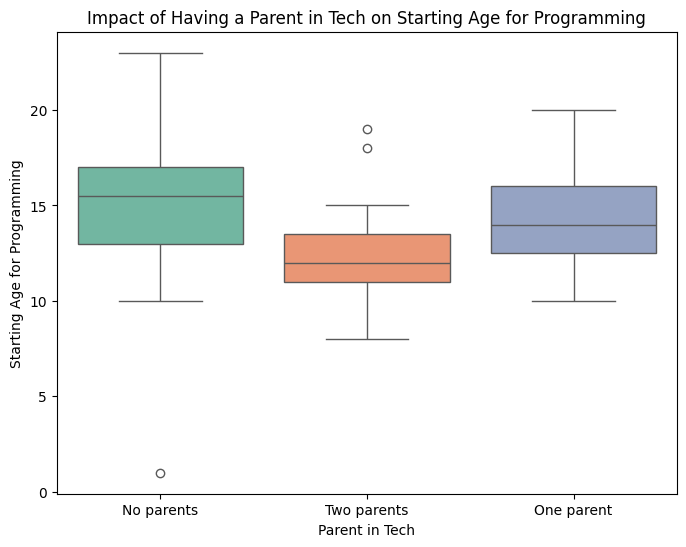

In [10]:
import pandas as pd
from scipy.stats import f_oneway, kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Rename columns
df = df.rename(columns={
    'Do you have a parent in tech?': 'Parent_in_Tech',
    'At what age did you start programming?': 'Starting_Age_Programming'
})

# new data frame
data = pd.DataFrame({
    'Parent_in_Tech': df['Parent_in_Tech'],
    'Starting_Age_Programming': df['Starting_Age_Programming']
})

# group data
group_no_parents = data[data['Parent_in_Tech'] == 'No parents']['Starting_Age_Programming']
group_one_parent = data[data['Parent_in_Tech'] == 'One parent']['Starting_Age_Programming']
group_two_parents = data[data['Parent_in_Tech'] == 'Two parents']['Starting_Age_Programming']

none = group_no_parents.to_list()
one = group_one_parent.to_list()
two = group_two_parents.to_list()

# statistical tests
# anova test
# assume normal because n > 30
anova_stat, anova_p = f_oneway(group_no_parents, group_one_parent, group_two_parents)

# anova results
print("ANOVA results:")
print(f"F-statistic: {anova_stat:.2f}, p-value: {anova_p:.4f}")

# boxplot results
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parent_in_Tech', y='Starting_Age_Programming', data=data, palette='Set2')
plt.title("Impact of Having a Parent in Tech on Starting Age for Programming")
plt.xlabel("Parent in Tech")
plt.ylabel("Starting Age for Programming")
plt.show()


# looking at the results of the anova test, there is no significant impact
# of having parents in tech on whether people will start programming at an earlier age
# since the p value is greater than .05, it is not statistically significant

# looking at the results of the boxplot, the anova test is proven true
# the majority of all three IQR are very close to each other
# there are some outliers, but majority of starting programming ages are very similar
# and does not have a significant difference on whether having tech parents
# influence those starting ages

6. Assume that the students who gave response to this survey have a consistent studying habit. Based on that assumption, does studying with friends help with grades? What about note taking?



Your answer:

Studying with Friends:
F-statistic = 0.73, p-value = 0.4854

Note Taking:
F-statistic = 1.93, p-value = 0.1325


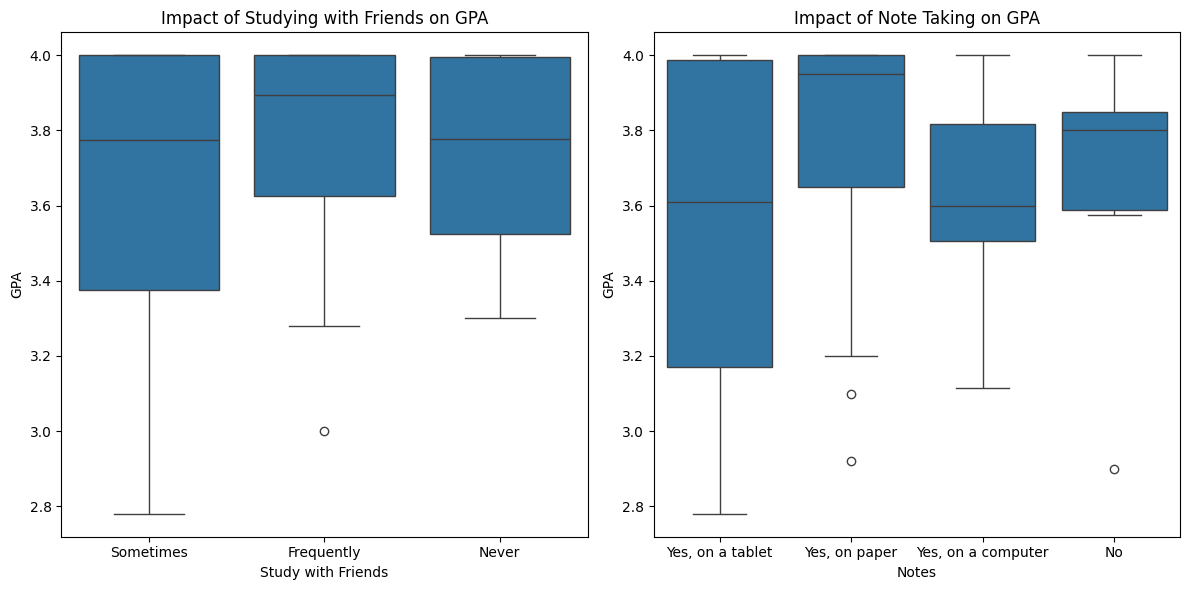

In [11]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt


# rename columns
df = df.rename(columns={
    'Do you study with friends?': 'Study_friends',
    'Do you take notes in classes?': 'Take_notes',
    'What was your GPA LAST SEMESTER?': 'GPA'
})


# group data
study_friends_freq = df[df['Study_friends'] == 'Frequently']['GPA']
study_friends_some = df[df['Study_friends'] == 'Sometimes']['GPA']
study_friends_none = df[df['Study_friends'] == 'Never']['GPA']

notes_comp = df[df['Take_notes'] == 'Yes, on a computer']['GPA']
notes_tab = df[df['Take_notes'] == 'Yes, on a tablet']['GPA']
notes_paper = df[df['Take_notes'] == 'Yes, on paper']['GPA']
notes_none = df[df['Take_notes'] == 'No']['GPA']


# statistical tests
# For studying with friends
# anova test
# assume normal because n > 30
anova_stat_study, anova_p_study = f_oneway(study_friends_freq, study_friends_some, study_friends_none)

# For note taking
# anova test
# assume normal because n > 30
anova_stat_notes, anova_p_notes = f_oneway(notes_comp, notes_tab, notes_paper, notes_none)

# anova results
print("Studying with Friends:")
print(f"F-statistic = {anova_stat_study:.2f}, p-value = {anova_p_study:.4f}")

print("\nNote Taking:")
print(f"F-statistic = {anova_stat_notes:.2f}, p-value = {anova_p_notes:.4f}")

# boxplot results
plt.figure(figsize=(12, 6))

# boxplot for studying with friends
plt.subplot(1, 2, 1)
sns.boxplot(x='Study_friends', y='GPA', data=df)
plt.title("Impact of Studying with Friends on GPA")
plt.xlabel("Study with Friends")
plt.ylabel("GPA")

# boxplot for note taking
plt.subplot(1, 2, 2)
sns.boxplot(x='Take_notes', y='GPA', data=df)
plt.title("Impact of Note Taking on GPA")
plt.xlabel("Notes")
plt.ylabel("GPA")

plt.tight_layout()
plt.show()


# looking at the f stat for studying with friends,
# since the p value is greater than .05, there is no statistically significant impact
# of whether studying with friends or not impacts GPA
# similarly, looking at the f stat for note taking
# though it is somewhat more significant than studying with friends,
# since the p value is still greater than .05, there is no statistically significant impact
# of whether taking notes (on comp, tab, paper) or not impacts GPA

# looking at the boxplot results, the anova test are proven somewhat true
# especially for studying with friends, all of the IQR start near the 4.0 mark
# and end near the 3.4-3.6, with the medians between 3.8-3.9,
# this shows that there is not a significant impact on whether studying with friends
# influences GPA or not
# there is more of a spread for taking notes, but is still no significant influence
# on whether taking notes or not impacts GPA
# the majority of all GPA are between the 3.6-3.8 mark, so again
# there is no statistically significant influence on note taking and GPA
